<a href="https://colab.research.google.com/github/abhikadam27/Deep-Learning/blob/main/Mnist_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MNIST number recognization using keras***

## Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils
import tensorflow as tf

## Loading mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_test.shape

(10000,)

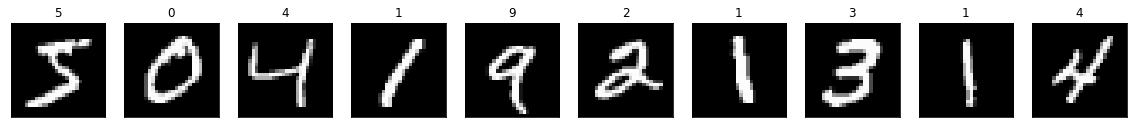

In [4]:
fig, axes = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = ( 20, 4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap = 'gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
y_test.shape

(10000, 10)

## Model Building

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='Softmax'))

In [8]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd4013d4d90>>

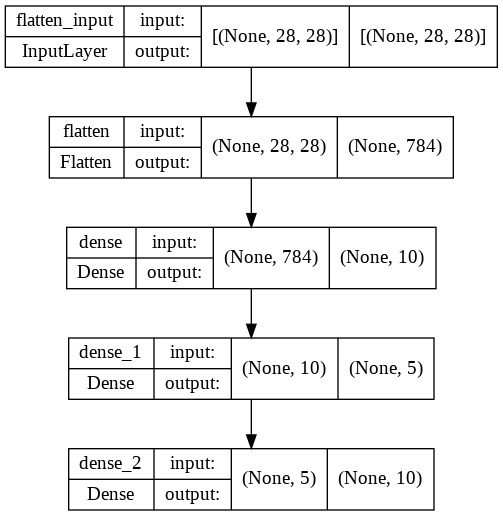

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True)

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

In [11]:
history = model.fit(x_train, y_train, epochs=29,
          validation_data = (x_test,y_test))

Epoch 1/29
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8405 - acc: 0.3517 - val_loss: 1.4181 - val_acc: 0.5564
Epoch 2/29
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2808 - acc: 0.5582 - val_loss: 1.1477 - val_acc: 0.6194
Epoch 3/29
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0813 - acc: 0.6543 - val_loss: 1.0133 - val_acc: 0.7064
Epoch 4/29
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9581 - acc: 0.7105 - val_loss: 0.9245 - val_acc: 0.7257
Epoch 5/29
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8866 - acc: 0.7420 - val_loss: 0.8697 - val_acc: 0.7421
Epoch 6/29
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8737 - acc: 0.7190 - val_loss: 0.8300 - val_acc: 0.7635
Epoch 7/29
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7920 - acc: 0.7630 - val_loss: 0.7407 - val_acc: 0.7725
Epoch 8/29
1875/1875 [==============================] - 4s 2ms

In [12]:
model.save('mnist_model.h5')

In [13]:
history.history

{'loss': [1.8405226469039917,
  1.2808209657669067,
  1.0812820196151733,
  0.958084762096405,
  0.8866204619407654,
  0.8736825585365295,
  0.7919701933860779,
  0.753068208694458,
  0.7449225187301636,
  0.7225518822669983,
  0.7283688187599182,
  0.6970927715301514,
  0.6752174496650696,
  0.6709682941436768,
  0.6417038440704346,
  0.6425381302833557,
  0.6544463038444519,
  0.6250541806221008,
  0.6269846558570862,
  0.6007912158966064,
  0.603786289691925,
  0.6006709933280945,
  0.5772830843925476,
  0.5832643508911133,
  0.5768091678619385,
  0.5683172941207886,
  0.5624353885650635,
  0.5734636187553406,
  0.5656712055206299],
 'acc': [0.35171666741371155,
  0.5581666827201843,
  0.6542666554450989,
  0.7105333209037781,
  0.7419666647911072,
  0.7190499901771545,
  0.7630166411399841,
  0.7710833549499512,
  0.7702500224113464,
  0.7760833501815796,
  0.7839499711990356,
  0.7769833207130432,
  0.7827333211898804,
  0.7884166836738586,
  0.8038166761398315,
  0.80456668138504

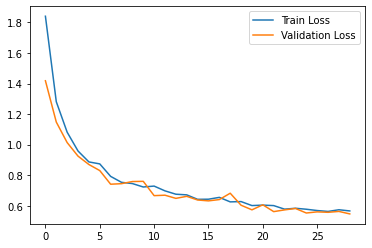

In [14]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

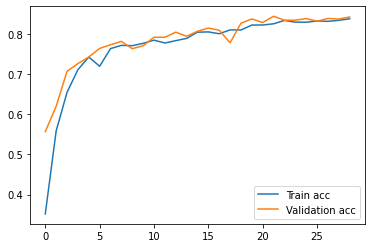

In [15]:
plt.plot(history.history['acc'], label = "Train acc")
plt.plot(history.history['val_acc'], label = "Validation acc")
plt.legend()
plt.show()

In [16]:
import keras
model = keras.models.load_model('mnist_model.h5')

# ***Lets make prediction for a image***

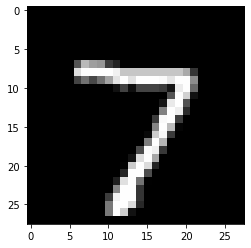

In [17]:
plt.imshow(x_test[0], cmap='gray')

In [18]:
x= np.reshape(x_test[0], (1,28,28))
np.argmax(model.predict(x))

7

great we got exact output for given image with our model.